In [350]:
#function for normalization
def zcorenorm(data):
    datarow=data.shape[0]
    datacol=data.shape[1]
    meanvec=np.mean(data,axis=0)
    sdvec=np.std(data,axis=0)
    meanvec=meanvec.reshape(1,datacol)
    x=np.subtract(data,meanvec)
    data_norm=x/sdvec
    return data_norm
    

In [351]:
#function to divide the train and test datas
def dividedata(data):
    datarow=data.shape[0]
    datacol=data.shape[1]
    np.random.seed(8675309)
    x=(3*datarow)//4
    trainindex=np.random.randint(0,datarow,x)
    index=np.arange(datarow)
    testindex=np.setdiff1d(index,trainindex)
    train=data[trainindex,:]
    test=data[testindex,:]
    div=[train,test]
    return div

In [352]:
import numpy as np
#reading each data set
airfoil=np.loadtxt("airfoil_self_noise.dat.txt")
slump_draft=np.genfromtxt("slump_test.data.txt",skip_header=1,unpack=True,dtype=([float,float,float,float,float,float,float,float,float,float]),delimiter=',')
#converting ndarray of 103 to 103X10
slump=np.zeros([len(slump_draft),10])
for i in range(103):
    for j in range(10):
        slump[i,j]=slump_draft[i][j]
yacht=np.loadtxt("yacht_hydrodynamics.data.txt")
#normalizing each data set
airfoil_norm=zcorenorm(airfoil)
slump_norm=zcorenorm(slump)
yacht_norm=zcorenorm(yacht)
#dividing each data
airfoil_div=dividedata(airfoil_norm)
yacht_div=dividedata(yacht_norm)
slump_div=dividedata(slump_norm)
airfoil_train=airfoil_div[0]
airfoil_testcom=airfoil_div[1]
yacht_train=yacht_div[0]
yacht_testcom=yacht_div[1]
slump_train=slump_div[0]
slump_testcom=slump_div[1]
#removing last column form test
airfoil_test=airfoil_testcom[:,:-1]
yacht_test=yacht_testcom[:,:-1]
slump_test=slump_testcom[:,:-3]
airfoil_real=airfoil_testcom[:,-1]
yacht_real=yacht_testcom[:,-1]
slump_real=slump_testcom[:,-3]
airfoil_real=airfoil_real.reshape(airfoil_real.shape[0],1)
yacht_real=yacht_real.reshape(yacht_real.shape[0],1)
slump_real=slump_real.reshape(slump_real.shape[0],1)


In [353]:
# this function performs linear regression which we will use in my_regression function
def linear_regression(train,test,l,noutput):
    trainrow=train.shape[0]
    traincol=train.shape[1]
    testrow=test.shape[0]
    testcol=test.shape[1]
    features=traincol-noutput
    I=np.identity(features+1)
    trainfeatures=train[:,:traincol-noutput]#omitting the target values
    t=train[:,range(traincol-noutput,traincol)]
    phi_linear=np.append(trainfeatures,np.ones(trainrow).reshape(trainrow,1),axis=1) #adding column of ones to phi
    q=np.dot(phi_linear.transpose(),t)
    w_linear=np.dot(inv(l*I+np.dot(phi_linear.transpose(),phi_linear)),q) #finding the weight vector w using linear regression
    #print(w_linear)
    test=np.append(test,np.ones(testrow).reshape(testrow,1),axis=1) #adding column of ones to testset
    w_linear=w_linear.reshape(w_linear.shape[0],noutput)
    y=np.dot(test,w_linear)
    return y

In [354]:
def quad_regression(trainX,testX,l,noutput):
    trainrow=trainX.shape[0]
    traincol=trainX.shape[1]
    testrow=testX.shape[0]
    testcol=testX.shape[1]
    features=traincol-noutput
    trainfeatures=trainX[:,:traincol-noutput]#omitting the target values
    t=trainX[:,range(traincol-noutput,traincol)]
    test_sq=np.square(testX)
    test_polyquad=np.append(testX,test_sq,axis=1)
    sq=np.square(trainfeatures)
    phi_polyquad=np.append(trainfeatures,sq,axis=1)
    #phi_polynomial=np.append(phi_polynomial,np.ones(trainrow).reshape(trainrow,1),axis=1) #adding column of ones to phi
    #phi_polytest=np.append(phi_polytest,np.ones(testrow).reshape(testrow,1),axis=1) #adding column of ones to testset
    #print("phi_polynomial",phi_polyquad.shape)
    #print("phi_polytest",phi_polyquad.shape)
    I=np.identity(phi_polyquad.shape[1])
    q=np.dot(phi_polyquad.transpose(),t)
    w_polyquad=np.dot(inv(l*I+np.dot(phi_polyquad.transpose(),phi_polyquad)),q)
    w_polyquad=w_polyquad.reshape(w_polyquad.shape[0],noutput)
    y=np.dot(test_polyquad,w_polyquad)
    return y

In [355]:
def cubic_regression(trainX,testX,l,noutput): 
        trainrow=trainX.shape[0]
        traincol=trainX.shape[1]
        testrow=testX.shape[0]
        testcol=testX.shape[1]
        features=traincol-noutput
        trainfeatures=trainX[:,:traincol-noutput]#omitting the target values
        t=trainX[:,range(traincol-noutput,traincol)]
        test_sq=np.square(testX)
        test_cube=np.power(testX, 3)
        test_cubic=np.append(testX,test_sq,axis=1)
        test_cubic=np.append(test_cubic,test_cube,axis=1)
        sq=np.square(trainfeatures)
        cube=np.power(trainfeatures, 3)
        phi_cubicpoly=np.append(trainfeatures,sq,axis=1)
        phi_cubicpoly=np.append(phi_cubicpoly,cube,axis=1)
        #phi_cubicpoly=np.append(phi_cubicpoly,np.ones(trainrow).reshape(trainrow,1),axis=1) #adding column of ones to phi
        #test_cubic=np.append(test_cubic,np.ones(testrow).reshape(testrow,1),axis=1) #adding column of ones to testset
        #print("phi_cubicpoly",phi_cubicpoly.shape)
        #print("test_cubic",test_cubic.shape)
        I=np.identity(phi_cubicpoly.shape[1])
        q=np.dot(phi_cubicpoly.transpose(),t)
        w_cubicpoly=np.dot(inv(l*I+np.dot(phi_cubicpoly.transpose(),phi_cubicpoly)),q)
        w_cubicpoly=w_cubicpoly.reshape(w_cubicpoly.shape[0],noutput)
        y=np.dot(test_cubic,w_cubicpoly)
        return y

In [ ]:
def gaussian_regression(trainX,testX,l,noutput): 
        trainrow=trainX.shape[0]
        traincol=trainX.shape[1]
        testrow=testX.shape[0]
        testcol=testX.shape[1]
        features=traincol-noutput
        trainfeatures=trainX[:,:traincol-noutput]#omitting the target values
        t=trainX[:,range(traincol-noutput,traincol)]
        

In [356]:
def my_regression(trainX,testX,noutput):
    trainrow=trainX.shape[0]
    traincol=trainX.shape[1]
    #5 fold cross validation begins
    f=trainrow//5
    fold1=trainX[range(0,f),:]
    fold2=trainX[range(f,2*f),:]
    fold3=trainX[range(2*f,3*f),:]
    fold4=trainX[range(3*f,4*f),:]
    fold5=trainX[range(4*f,trainrow),:]
    train1=np.concatenate((fold1,fold2,fold3,fold4), axis=0)
    train2=np.concatenate((fold1,fold2,fold3,fold5), axis=0)
    train3=np.concatenate((fold1,fold2,fold4,fold5), axis=0)
    train4=np.concatenate((fold1,fold3,fold4,fold5), axis=0)
    train5=np.concatenate((fold2,fold3,fold4,fold5), axis=0)
    test1=fold1[:,:traincol-noutput]
    test2=fold2[:,:traincol-noutput]
    test3=fold3[:,:traincol-noutput]
    test4=fold4[:,:traincol-noutput]
    test5=fold5[:,:traincol-noutput]
    real1=fold1[:,range(traincol-noutput,traincol)].reshape(fold1.shape[0],noutput)
    real2=fold2[:,range(traincol-noutput,traincol)].reshape(fold2.shape[0],noutput)
    real3=fold3[:,range(traincol-noutput,traincol)].reshape(fold3.shape[0],noutput)
    real4=fold4[:,range(traincol-noutput,traincol)].reshape(fold4.shape[0],noutput)
    real5=fold5[:,range(traincol-noutput,traincol)].reshape(fold5.shape[0],noutput)
    trainlist=[train1,train2,train3,train4,train5]
    testlist=[test1,test2,test3,test4,test5]
    reallist=[real1,real2,real3,real4,real5]
     #5 fold cross validation ends
        
    #predicting
    linear=[float]*6
    Err_linear=[float]*6
    quad=[float]*6
    Err_quad=[float]*6
    cubic=[float]*6
    Err_cubic=[float]*6
    lamb=[0.001,0.01,0.1,1,10,100]
    # running linear regression function for multiple values of lambda
    for i in range(6):
        #applying Linear basis function
        linear[i]=linear_regression(trainlist[1],testlist[1],lamb[i],noutput)#predicting values for each lambda
        linear[i]=linear[i].reshape(linear[i].shape[0],noutput)
        Err_linear[i]=np.sum(np.square(reallist[1]-linear[i]))/2 #finding sum of squares error for each lambda
        
        #applying quadractic basis function
        quad[i]=quad_regression(trainlist[1],testlist[1],lamb[i],noutput)#predicting values for each lambda
        quad[i]=quad[i].reshape(quad[i].shape[0],noutput)
        Err_quad[i]=np.sum(np.square(reallist[1]-quad[i]))/2 #finding sum of squares error for each lambda
        
        #applying cubic basis function
        cubic[i]=cubic_regression(trainlist[1],testlist[1],lamb[i],noutput)#predicting values for each lambda
        cubic[i]=cubic[i].reshape(cubic[i].shape[0],noutput)
        Err_cubic[i]=np.sum(np.square(reallist[1]-cubic[i]))/2 #finding sum of squares error for each lambda
        
        
    #plotting   
    
    #plotting for linear basis
    print("plot for lamda and sum of squares of errors")
    import matplotlib.pyplot as plt
    plt.plot(lamb,Err_linear)
    plt.title("lambda versus sum of squares error for linear basis function")
    plt.ylabel('sum of squares of errors')
    plt.xlabel('lamda values')
    plt.show()
    
    #plotting for quadractic polynomial basis
    plt.plot(lamb,Err_quad)
    plt.title("lambda versus sum of squares error for quadractic basis function")
    plt.ylabel('sum of squares of errors')
    plt.xlabel('lamda values')
    plt.show()
    
    #plotting for cubic polynomial basis
    plt.plot(lamb,Err_cubic)
    plt.title("lambda versus sum of squares error for cubic basis function")
    plt.ylabel('sum of squares of errors')
    plt.xlabel('lamda values')
    plt.show()
    
    
    print("\nerrors for linear basis functions for different lambdas")
    l=np.array(lamb).reshape(1,len(lamb))
    e1=np.array(Err_linear).reshape(1,len(Err_linear))
    print(np.append(l,e1,axis=0))
    best_lamindx_linear=Err_linear.index(min(Err_linear)) #finding the best lambda with least sum of squares error
    best_lam_linear=lamb[best_lamindx_linear]
    print("best Lambda:",best_lam_linear)
    
    print("\nerrors for quadractic functions for different lambdas")
    e2=np.array(Err_quad).reshape(1,len(Err_quad))
    print(np.append(l,e2,axis=0))
    best_lamindx_quad=Err_quad.index(min(Err_quad)) #finding the best lambda with least sum of squares error
    best_lam_quad=lamb[best_lamindx_quad]
    print("best Lambda:",best_lam_quad)
    
    print("\nerrors for cubic functions for different lambdas")
    e3=np.array(Err_cubic).reshape(1,len(Err_cubic))
    print(np.append(l,e3,axis=0))
    best_lamindx_cubic=Err_cubic.index(min(Err_cubic)) #finding the best lambda with least sum of squares error
    best_lam_cubic=lamb[best_lamindx_cubic]
    print("best Lambda:",best_lam_cubic)
    
    error=[Err_linear,Err_quad,Err_cubic]
    
    if(error.index(min(error))==0):
        print("linear basis function gives best result with lambda:",best_lam_linear)
        return linear_regression(trainX,testX,best_lam_linear,noutput)
    elif(error.index(min(error))==1):
        print("\nquadractic polynomial basis function gives best result with lambda:",best_lam_quad)
        return quad_regression(trainX,testX,best_lam_quad,noutput)
    else:
        print("\ncubic polynomial basis function gives best result with lambda:",best_lam_cubic)
        return cubic_regression(trainX,testX,best_lam_cubic,noutput)    

plot for lamda and sum of squares of errors


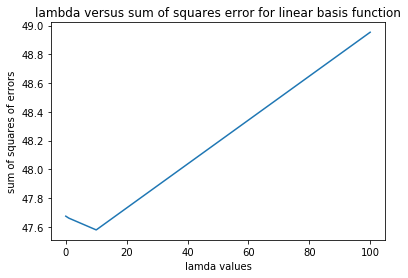

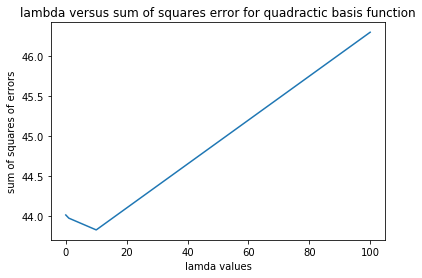

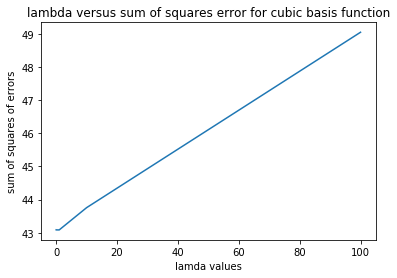


errors for linear basis functions for different lambdas
[[  1.00000000e-03   1.00000000e-02   1.00000000e-01   1.00000000e+00
    1.00000000e+01   1.00000000e+02]
 [  4.76747350e+01   4.76746073e+01   4.76733358e+01   4.76610632e+01
    4.75791838e+01   4.89536102e+01]]
best Lambda: 10

errors for quadractic functions for different lambdas
[[  1.00000000e-03   1.00000000e-02   1.00000000e-01   1.00000000e+00
    1.00000000e+01   1.00000000e+02]
 [  4.40122173e+01   4.40118270e+01   4.40079561e+01   4.39722986e+01
    4.38248633e+01   4.63032351e+01]]
best Lambda: 10

errors for cubic functions for different lambdas
[[  1.00000000e-03   1.00000000e-02   1.00000000e-01   1.00000000e+00
    1.00000000e+01   1.00000000e+02]
 [  4.30895747e+01   4.30893343e+01   4.30871757e+01   4.30866281e+01
    4.37573669e+01   4.90435477e+01]]
best Lambda: 1

cubic polynomial basis function gives best result with lambda: 1

error for best basis function and lambda: 156.594826634


In [357]:
#calling my regression function of airfoil data
y=my_regression(airfoil_train,airfoil_test,1)
Err_airfoil=np.sum(np.square(airfoil_real-y))/2
print("\nerror for best basis function and lambda:",Err_airfoil)


(155, 6)
plot for lamda and sum of squares of errors


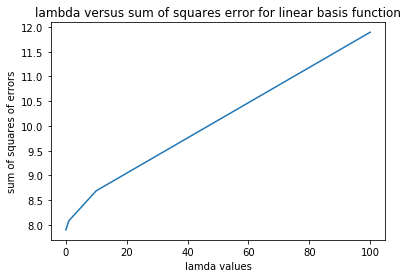

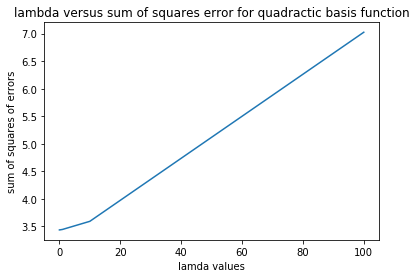

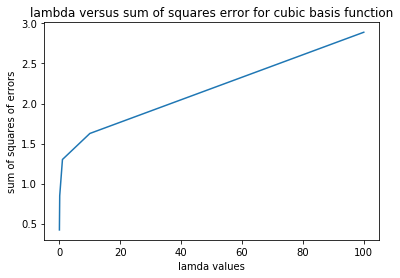


errors for linear basis functions for different lambdas
[[  1.00000000e-03   1.00000000e-02   1.00000000e-01   1.00000000e+00
    1.00000000e+01   1.00000000e+02]
 [  7.90027303e+00   7.90167424e+00   7.91680439e+00   8.08451157e+00
    8.69103325e+00   1.18938243e+01]]
best Lambda: 0.001

errors for quadractic functions for different lambdas
[[  1.00000000e-03   1.00000000e-02   1.00000000e-01   1.00000000e+00
    1.00000000e+01   1.00000000e+02]
 [  3.43513490e+00   3.43510699e+00   3.43534918e+00   3.44353291e+00
    3.59128172e+00   7.02503971e+00]]
best Lambda: 0.01

errors for cubic functions for different lambdas
[[  1.00000000e-03   1.00000000e-02   1.00000000e-01   1.00000000e+00
    1.00000000e+01   1.00000000e+02]
 [  4.21139681e-01   4.73276349e-01   8.48006765e-01   1.30081694e+00
    1.62577768e+00   2.88998777e+00]]
best Lambda: 0.001

cubic polynomial basis function gives best result with lambda: 0.001
1.5368150521


In [358]:
#calling my regression function of yacht data
print(yacht_test.shape)
y=my_regression(yacht_train,yacht_test,1)
Err_yacht=np.sum(np.square(yacht_real-y))/2
print(Err_yacht)

plot for lamda and sum of squares of errors


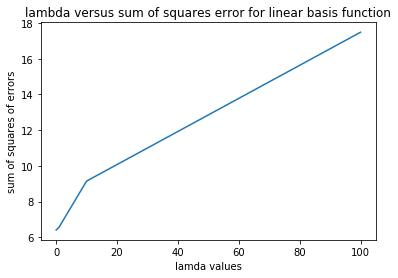

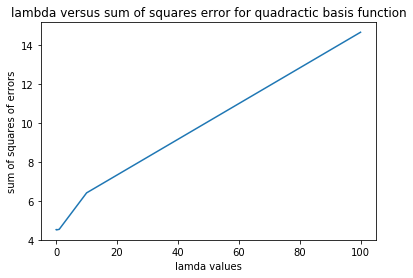

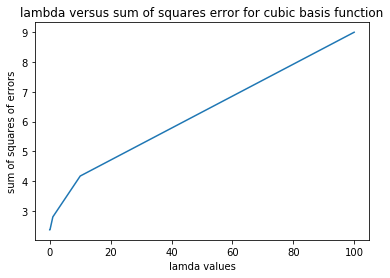


errors for linear basis functions for different lambdas
[[  1.00000000e-03   1.00000000e-02   1.00000000e-01   1.00000000e+00
    1.00000000e+01   1.00000000e+02]
 [  6.41174947e+00   6.41233919e+00   6.41943296e+00   6.57857074e+00
    9.14857136e+00   1.74863204e+01]]
best Lambda: 0.001

errors for quadractic functions for different lambdas
[[  1.00000000e-03   1.00000000e-02   1.00000000e-01   1.00000000e+00
    1.00000000e+01   1.00000000e+02]
 [  4.53478166e+00   4.53333528e+00   4.52118481e+00   4.55239839e+00
    6.41696011e+00   1.46355925e+01]]
best Lambda: 0.1

errors for cubic functions for different lambdas
[[  1.00000000e-03   1.00000000e-02   1.00000000e-01   1.00000000e+00
    1.00000000e+01   1.00000000e+02]
 [  2.36140023e+00   2.36075269e+00   2.38153404e+00   2.79761538e+00
    4.17128997e+00   9.00177948e+00]]
best Lambda: 0.01

cubic polynomial basis function gives best result with lambda: 0.01
67.13424847


In [359]:
#calling my regression function of slump data
y=my_regression(slump_train,slump_test,3)
Err_slump=np.sum(np.square(slump_real-y))/2
print(Err_slump)